## Text Analytics Assignment 

__Team__ 

__Name__ : Sundar Balasubramanian
__PG ID__: 11810130

__Name__  : Gopinath Thulasidoss
__PG ID__ : 11810136

__Name__  : Karthikeyan Thirumal
__PG ID__: 11810131

## Text Classification

Task:
1. 
2. 
3. 
4. 
5. 
6. 

In [66]:
# First import the required libraries

import pandas as pd
import re

from sklearn.decomposition import LatentDirichletAllocation,PCA
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Gettnig rid of unnecessary warnings
import warnings; 
warnings.simplefilter('ignore')

In [23]:
categories = [
        'Cricket',
        'Movie',
        'Technology',
        'Health']

In [24]:
data_original = pd.read_csv("results-text-clssification.csv")

In [25]:
data_original.head()

,Text,Category
0,\n,Cricket
1,Cricket is a bat-and-ball game played between ...,Cricket
2,There are various formats ranging from Twenty2...,Cricket
3,"Historically, cricket's origins are uncertain ...",Cricket
4,\n,Cricket


In [26]:
categories = list(data_original['Category'].drop_duplicates())



In [27]:
integers = list(range(1,5))
category_id = dict(zip(categories,integers))
rev_category_id = inv_map = {v: k for k, v in category_id.items()}
category_id

{'Cricket': 1, 'Movie': 2, 'Technology': 3, 'Health': 4}

In [29]:
data = data_original
data['id'] = data['Category'].map(category_id)
data = data.drop(columns=['Category'])
data.head()

,Text,id
0,\n,1
1,Cricket is a bat-and-ball game played between ...,1
2,There are various formats ranging from Twenty2...,1
3,"Historically, cricket's origins are uncertain ...",1
4,\n,1


In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sundar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
sent_tokenize(data['Text'][1])

['Cricket is a bat-and-ball game played between two teams of eleven players on a field at the centre of which is a 20-metre (22-yard) pitch with a wicket at each end, each comprising two bails balanced on three stumps.',
 'The batting side scores runs by striking the ball bowled at the wicket with the bat, while the bowling and fielding side tries to prevent this and dismiss each player (so they are "out").',
 'Means of dismissal include being bowled, when the ball hits the stumps and dislodges the bails, and by the fielding side catching the ball after it is hit by the bat, but before it hits the ground.',
 'When ten players have been dismissed, the innings ends and the teams swap roles.',
 'The game is adjudicated by two umpires, aided by a third umpire and match referee in international matches.',
 "They communicate with two off-field scorers who record the match's statistical information."]

In [32]:
def cleanText(text):
    text = re.sub('[^ a-zA-Z]','',text)
    text = re.sub(r' +', ' ', text)
    return text

wnl = WordNetLemmatizer()
def lemmatizeSentences(data):
    count = 0
    for text in data:
        # clean the text
        text = cleanText(text)
        sentence = ""
        for i, j in pos_tag(word_tokenize(text)):
            word = ''
            if j[0].lower() in ['n', 'v', 'r']:
                word = wnl.lemmatize(i, j[0].lower())
            elif j[0].lower() is 'j':
                word = wnl.lemmatize(i, 'a')
            else:
                word = wnl.lemmatize(i)
            sentence = sentence + " " + word.lower()
        data[count] = sentence
        count = count + 1;

    return data

In [33]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sundar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sundar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
data['Text'] = lemmatizeSentences(data['Text'])

data['Text'].head()

0                                                     
1     cricket be a batandball game play between two...
2     there be various format range from twenty pla...
3     historically cricket origin be uncertain and ...
4                                                     
Name: Text, dtype: object

In [35]:
vectorizer = CountVectorizer(min_df = 0.05 , max_df= 0.95, stop_words="english")
features2 = pd.DataFrame(vectorizer.fit_transform(data['Text']).toarray(),columns=vectorizer.get_feature_names())

features2.head()

,allow,art,ball,base,bat,batsman,begin,bowl,bowler,case,...,united,use,usually,various,view,way,wicket,work,world,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,3,0,2,0,0,2,0,0,...,0,0,0,0,0,0,2,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(features2, data['id'],test_size=0.30)

## Why 0.3??

In [38]:
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
model.score(X_test,y_test)

0.9487179487179487

In [40]:
cross_val_score(model,features2, data['id'],cv=4).mean()

0.8881878538128538

In [41]:
y_train.head()

200    3
114    2
228    4
226    4
117    2
Name: id, dtype: int64

In [42]:
X_train.head()

,allow,art,ball,base,bat,batsman,begin,bowl,bowler,case,...,united,use,usually,various,view,way,wicket,work,world,year
200,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
114,0,3,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
228,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [43]:
X_test.head()

,allow,art,ball,base,bat,batsman,begin,bowl,bowler,case,...,united,use,usually,various,view,way,wicket,work,world,year
59,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
68,0,0,5,0,1,4,0,2,3,0,...,0,0,0,0,0,2,0,0,0,0
211,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,1,0,1,0,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [44]:
y_test.head()

59     1
68     1
211    3
46     1
180    3
Name: id, dtype: int64

In [45]:
tfidfvectorizer = TfidfVectorizer(min_df=0.05,max_df=0.95,stop_words="english")
features3 = pd.DataFrame(tfidfvectorizer.fit_transform(data['Text']).toarray(),columns=tfidfvectorizer.get_feature_names())

features3.head()

,allow,art,ball,base,bat,batsman,begin,bowl,bowler,case,...,united,use,usually,various,view,way,wicket,work,world,year
0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.37228,0.0,0.272612,0.0,0.0,0.268592,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.254386,0.0,0.000000,0.0
2,0.0,0.0,0.18880,0.0,0.207381,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.217694,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.112283,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.092061,0.0
4,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(features3, data['id'],test_size=0.30)
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9615384615384616

In [48]:
cross_val_score(model,features3, data['id'],cv=4).mean()

0.92329901001776

In [49]:
lda = LatentDirichletAllocation(n_components=4)

features4 = pd.DataFrame(lda.fit_transform(features2))
features4.head()

,0,1,2,3
0,0.250000,0.250000,0.250000,0.250000
1,0.007628,0.977048,0.007663,0.007661
2,0.014005,0.958043,0.014053,0.013899
3,0.006598,0.913148,0.006508,0.073746
4,0.250000,0.250000,0.250000,0.250000


In [50]:
data['id'].head()

0    1
1    1
2    1
3    1
4    1
Name: id, dtype: int64

In [51]:
# Topic 0
topic0 = pd.DataFrame(lda.components_.transpose(),index = features2.columns).sort_values(by=0,ascending=False).iloc[:,0].head(10)
topic1 = pd.DataFrame(lda.components_.transpose(),index = features2.columns).sort_values(by=1,ascending=False).iloc[:,1].head(10)
topic2 = pd.DataFrame(lda.components_.transpose(),index = features2.columns).sort_values(by=2,ascending=False).iloc[:,2].head(10)
topic3 = pd.DataFrame(lda.components_.transpose(),index = features2.columns).sort_values(by=3,ascending=False).iloc[:,3].head(10)

pd.DataFrame([topic0.index,topic1.index,topic2.index,topic3.index]).transpose()

,0,1,2,3
0,technology,cricket,film,health
1,use,match,use,problem
2,human,play,picture,country
3,science,ball,movie,include
4,tool,batsman,production,social
5,new,team,make,issue
6,technological,run,motion,public
7,include,wicket,industry,work
8,time,bowler,produce,united
9,term,end,usually,number


In [53]:
X_train, X_test, y_train, y_test = train_test_split(features4, data['id'],test_size=0.30)
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9743589743589743

In [54]:
cross_val_score(model,features4, data['id'],cv=4).mean()

0.9264181131368631

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix


In [55]:
X_train, X_test, y_train, y_test = train_test_split(features2,data_subset.iloc[:,-1])


In [58]:
clf = MultinomialNB()
clf.fit(X_train,y_train)

# Prediction accuracy on test dataset
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.9692307692307692

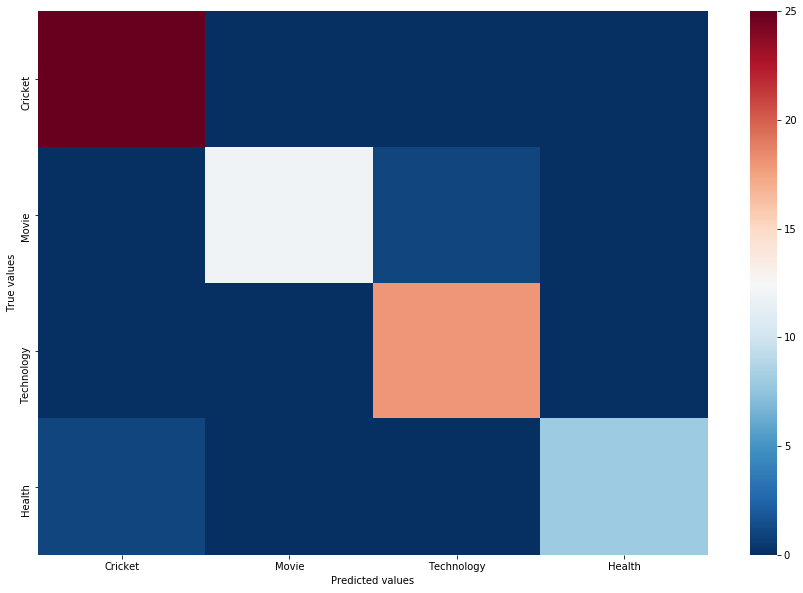

In [63]:

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat , cmap="RdBu_r", xticklabels = categories, yticklabels = categories)
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features3,data_subset.iloc[:,-1])
clf = MultinomialNB()
clf.fit(X_train,y_train)

# Prediction accuracy on test dataset
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.9538461538461539

In [65]:
X_train, X_test, y_train, y_test = train_test_split(features4,data_subset.iloc[:,-1])
clf = MultinomialNB()
clf.fit(X_train,y_train)

# Prediction accuracy on test dataset
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.9076923076923077